<a href="https://colab.research.google.com/github/rifatkhan545/Deep-Learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MD RASHADUL ISLAM**
email :*rifatkhan545@yahoo.com*

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [2]:
train_path ='/content/drive/MyDrive/Covid19-dataset/train'
test_path ='/content/drive/MyDrive/Covid19-dataset/test'
img_size = [224, 224]

# **InceptionV3 Architecture**

In [3]:
inception = InceptionV3(include_top=False, weights='imagenet', classifier_activation='softmax', input_shape= img_size +[3])

87916544/87910968 [==============================] - 0s 0us/step


In [4]:
for layer in inception.layers:
  layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/Covid19-dataset/train/*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation= 'softmax')(x)

In [8]:
model = Model(inputs = inception.input, outputs = prediction )

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [11]:
train_data = ImageDataGenerator(rescale=1./255, zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2)
test_data = ImageDataGenerator(rescale= 1./255)

In [12]:
training_set = train_data.flow_from_directory(train_path, target_size=(224,224), class_mode='categorical', batch_size= 16)
testing_set = train_data.flow_from_directory(test_path, target_size=(224,224), class_mode='categorical', batch_size= 16)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [13]:
r = model.fit_generator(training_set, validation_data= testing_set, epochs= 20, steps_per_epoch= len(training_set), validation_steps=len(testing_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
16/16 [==============================] - 192s 12s/step - loss: 3.6305 - accuracy: 0.6043 - val_loss: 1.1985 - val_accuracy: 0.7727
Epoch 2/20
16/16 [==============================] - 14s 887ms/step - loss: 1.1813 - accuracy: 0.8277 - val_loss: 1.0792 - val_accuracy: 0.8333
Epoch 3/20
16/16 [==============================] - 14s 902ms/step - loss: 0.4803 - accuracy: 0.9168 - val_loss: 1.9185 - val_accuracy: 0.7424
Epoch 4/20
16/16 [==============================] - 14s 914ms/step - loss: 0.9134 - accuracy: 0.9042 - val_loss: 0.3063 - val_accuracy: 0.8939
Epoch 5/20
16/16 [==============================] - 14s 891ms/step - loss: 0.7998 - accuracy: 0.8885 - val_loss: 2.9873 - val_accuracy: 0.7424
Epoch 6/20
16/16 [==============================] - 14s 893ms/step - loss: 1.2349 - accuracy: 0.8292 - val_loss: 1.1769 - val_accuracy: 0.8788
Epoch 7/20
16/16 [==============================] - 14s 879ms/step - loss: 0.4084 - accuracy: 0.9359 - val_loss: 1.0361 - val_accuracy: 0.8182


In [14]:
import matplotlib.pyplot as plt

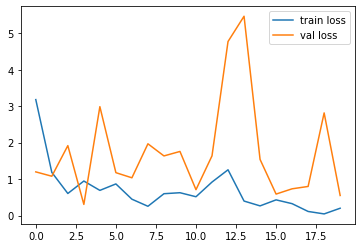

In [15]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

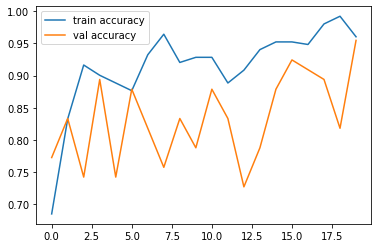

In [16]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model.save('inception_covid.h5')

In [20]:
y_pred = model.predict(testing_set)

In [21]:
y_pred

array([[1.00000000e+00, 1.10401349e-32, 7.26514861e-24],
       [6.39728241e-05, 9.99935985e-01, 7.93321745e-12],
       [1.00000000e+00, 2.61563627e-27, 4.28649758e-17],
       [2.69863472e-12, 3.07108180e-12, 1.00000000e+00],
       [5.60611845e-21, 2.96432107e-28, 1.00000000e+00],
       [1.00000000e+00, 1.76663974e-17, 2.23510672e-11],
       [9.95716155e-01, 2.66322941e-09, 4.28381655e-03],
       [1.00000000e+00, 1.72509197e-15, 7.04015795e-28],
       [2.54859501e-24, 2.12076023e-21, 1.00000000e+00],
       [1.00000000e+00, 7.10745173e-37, 0.00000000e+00],
       [1.00000000e+00, 1.52572485e-16, 4.33729011e-17],
       [9.33899784e-08, 3.66301421e-04, 9.99633551e-01],
       [1.00000000e+00, 6.33358616e-16, 1.37265670e-18],
       [1.00000000e+00, 1.08612429e-21, 6.45798897e-23],
       [4.51126911e-29, 9.99845028e-01, 1.54892390e-04],
       [2.05729648e-07, 9.99999762e-01, 4.52934565e-12],
       [2.86222841e-13, 1.39019171e-10, 1.00000000e+00],
       [2.92230770e-02, 1.85233

In [22]:
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1,
       0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1])

In [25]:
model = load_model('inception_covid.h5')

In [26]:
from tensorflow.keras.preprocessing import image

In [27]:
img = image.load_img('/content/drive/MyDrive/covidChestXRay.jpg', target_size=(224,224))

In [37]:
x = image.img_to_array(img)

In [38]:
x

array([[[  7.,   7.,   7.],
        [  6.,   6.,   6.],
        [  8.,   8.,   8.],
        ...,
        [ 15.,  15.,  15.],
        [ 13.,  13.,  13.],
        [ 14.,  14.,  14.]],

       [[ 12.,  12.,  12.],
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.],
        ...,
        [ 14.,  14.,  14.],
        [ 14.,  14.,  14.],
        [ 14.,  14.,  14.]],

       [[ 17.,  17.,  17.],
        [ 20.,  20.,  20.],
        [ 24.,  24.,  24.],
        ...,
        [ 14.,  14.,  14.],
        [ 15.,  15.,  15.],
        [ 13.,  13.,  13.]],

       ...,

       [[199., 199., 199.],
        [205., 205., 205.],
        [202., 202., 202.],
        ...,
        [192., 192., 192.],
        [187., 187., 187.],
        [177., 177., 177.]],

       [[194., 194., 194.],
        [200., 200., 200.],
        [203., 203., 203.],
        ...,
        [190., 190., 190.],
        [188., 188., 188.],
        [178., 178., 178.]],

       [[196., 196., 196.],
        [203., 203., 203.],
        [198., 1

In [39]:
x.shape

(224, 224, 3)

In [40]:
x =x/255

In [41]:
x

array([[[0.02745098, 0.02745098, 0.02745098],
        [0.02352941, 0.02352941, 0.02352941],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.06666667, 0.06666667, 0.06666667],
        [0.07843138, 0.07843138, 0.07843138],
        [0.09411765, 0.09411765, 0.09411765],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.78039217, 0.78039217, 0.78039217],
        [0.8039216 , 0.8039216 , 0.8039216 ],
        [0.7921569 , 0

In [42]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
img_data

array([[[[-0.9997847 , -0.9997847 , -0.9997847 ],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.99975395, -0.99975395, -0.99975395],
         ...,
         [-0.99953866, -0.99953866, -0.99953866],
         [-0.9996002 , -0.9996002 , -0.9996002 ],
         [-0.9995694 , -0.9995694 , -0.9995694 ]],

        [[-0.9996309 , -0.9996309 , -0.9996309 ],
         [-0.9996002 , -0.9996002 , -0.9996002 ],
         [-0.9996002 , -0.9996002 , -0.9996002 ],
         ...,
         [-0.9995694 , -0.9995694 , -0.9995694 ],
         [-0.9995694 , -0.9995694 , -0.9995694 ],
         [-0.9995694 , -0.9995694 , -0.9995694 ]],

        [[-0.99947715, -0.99947715, -0.99947715],
         [-0.9993849 , -0.9993849 , -0.9993849 ],
         [-0.9992618 , -0.9992618 , -0.9992618 ],
         ...,
         [-0.9995694 , -0.9995694 , -0.9995694 ],
         [-0.99953866, -0.99953866, -0.99953866],
         [-0.9996002 , -0.9996002 , -0.9996002 ]],

        ...,

        [[-0.99387926, -0.99387926, -0

In [44]:
model.predict(img_data)

array([[9.9866605e-01, 5.1881475e-06, 1.3287390e-03]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

In [46]:
a

array([0])